In [63]:
from manifold_learning.data.data_loader import load_csv_dataset, load_ld2011_2014_dataset, load_traffic_dataset
from manifold_learning import IMD
import importlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
importlib.reload(IMD)

<module 'manifold_learning.IMD' from '/home/iaroslav/Documents/Python projects/manifold_learning/src/manifold_learning/IMD.py'>

In [2]:
X = load_csv_dataset("Jan1023_1_fr_ma2sec_sr30.csv").to_numpy()[:,1:]

In [38]:
X = load_ld2011_2014_dataset().to_numpy()[:,1:].astype(np.float32)

In [2]:
X = load_traffic_dataset()
X = X.to_numpy()[:,1:].astype(np.float32).T
X[np.isnan(X)] = 0
X = np.log(X+1)
X = X[:,X.mean(axis=0) != 0]
X = (X-X.mean(axis=0))/X.std(axis=0)

In [2]:
X = load_traffic_dataset()
X = X[X.columns[1:]]

df = X.T

# Interpolate missing values
df_interpolated = df.interpolate(method='linear', limit_direction='forward', axis=0)

# Fill any remaining missing values with zeros
df_filled = df_interpolated.fillna(0)
X = df_filled.to_numpy().astype(np.float32)

X = np.log(X+1)
X = X[:,X.mean(axis=0) != 0]
X = (X-X.mean(axis=0))/X.std(axis=0)


pca = PCA(550)
X = pca.fit_transform(X)

In [64]:
trainer = IMD.IMD_nD(X.shape[1], embed_dim=40, n_components=5,learning_rate=0.0001, device="cpu",optimizer="Adam",random_state=2)

In [67]:
trainer.fit(X, sample_len=100, library_len=320, exclusion_rad=1, nbrs_num=12, tp=15, epochs=1, num_batches=1)


torch.Size([5, 100, 14]) tensor([[[135, 314, 269,  ...,  29, 317, 157],
         [  4, 253, 267,  ..., 164,  58,  55],
         [207, 187, 318,  ...,  87, 299, 205],
         ...,
         [ 81,  38, 118,  ...,  90,  37, 230],
         [104,  79, 123,  ...,  43,  24, 236],
         [ 10, 161, 276,  ...,  31, 269, 133]],

        [[306,   8, 135,  ..., 275, 289, 269],
         [253,  37, 168,  ...,  73,  63,  78],
         [207, 198,  95,  ..., 318,  72, 249],
         ...,
         [ 38,  30, 158,  ...,  48,  21, 163],
         [ 46,  79, 297,  ..., 232,  86, 210],
         [ 10, 238, 161,  ..., 133,  78, 245]],

        [[306, 135,   7,  ..., 283, 164, 311],
         [ 37, 253,   4,  ...,   3, 209, 164],
         [129, 207, 271,  ..., 236, 123, 155],
         ...,
         [118, 244,  81,  ...,  48, 113,  55],
         [ 46,  87, 140,  ..., 124, 260,  72],
         [161, 213,  10,  ..., 278, 301, 245]],

        [[178,  29, 135,  ..., 269,  78, 250],
         [253,  15,  23,  ..., 244

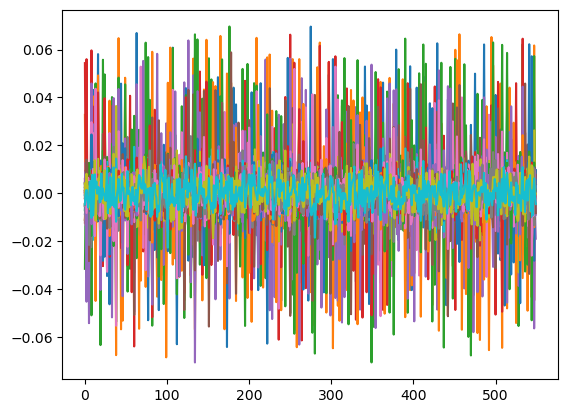

In [291]:
plt.plot(trainer.model.get_weights()[:,0,:])

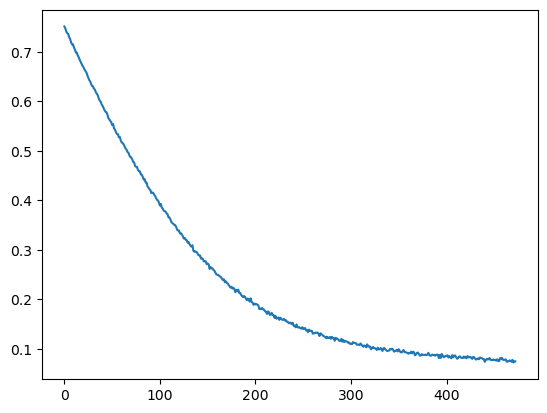

In [292]:
plt.plot(trainer.get_loss_history()[:])

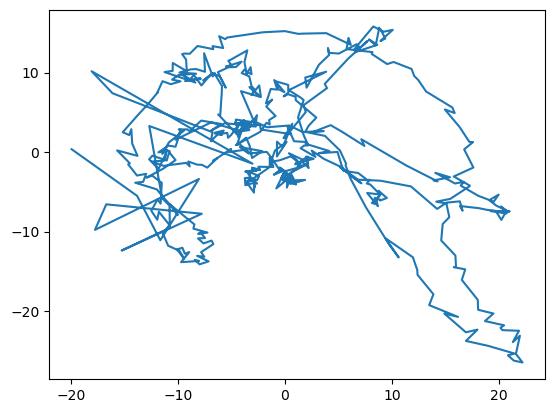

In [293]:
plt.plot(trainer.predict(X)[:,0,0],trainer.predict(X)[:,0,1])

In [294]:

unmixed = trainer.predict(X)

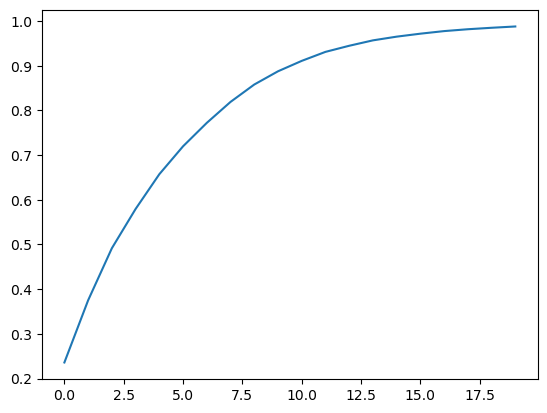

In [295]:

pca = PCA(20)
xxx = pca.fit_transform(unmixed[:,4])
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [296]:
import plotly.express as px

fig = px.line_3d(x=xxx[:,0], y=xxx[:,1],z=xxx[:,2],height=700)

fig.show()

In [297]:
from mpl_toolkits.mplot3d import Axes3D
import os
import imageio

output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

for i in range(300):
    trainer.fit(X, sample_len=300, library_len=800, nbrs_num=15, tp=40, epochs=1, num_batches=32)

    ax = plt.figure(figsize=(5, 5),dpi=200).add_subplot(projection='3d')
    ax.plot(*trainer.predict(X)[:, 0].T, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")

    plt.savefig(f"{output_dir}/frame_{i:02d}.png")
    plt.close()

#with imageio.get_writer('animation.gif', mode='I', duration=0.25) as writer:
with imageio.get_writer('animation_adam.mp4', mode='I') as writer:
    for i in range(300):
        filename = f"{output_dir}/frame_{i:02d}.png"
        image = imageio.imread(filename)
        writer.append_data(image)


Epoch 1/1, Loss: 0.1511
Epoch 1/1, Loss: 0.1505
Epoch 1/1, Loss: 0.1442
Epoch 1/1, Loss: 0.1476
Epoch 1/1, Loss: 0.1431
Epoch 1/1, Loss: 0.1436
Epoch 1/1, Loss: 0.1358


KeyboardInterrupt: 

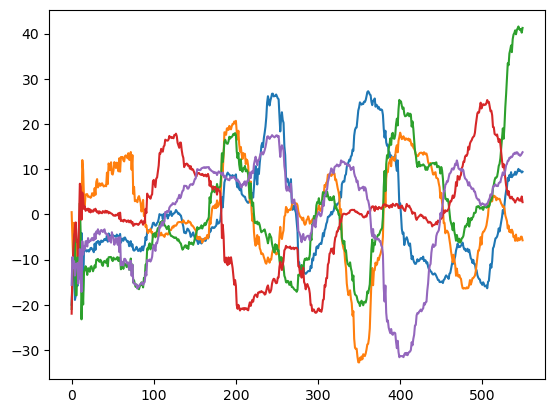

In [288]:
plt.plot(trainer.predict(X)[:,0,0])
plt.plot(trainer.predict(X)[:,0,1])
plt.plot(trainer.predict(X)[:,0,2])
plt.plot(trainer.predict(X)[:,0,3])
plt.plot(trainer.predict(X)[:,0,4])

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import os
import imageio
import matplotlib.pyplot as plt

# Assuming trainer is defined and has the 'fit' and 'predict' methods
output_dir = "frames"
os.makedirs(output_dir, exist_ok=True)

# Generate and save frames for the single figure with 4 subplots
for i in range(1000):
    trainer.fit(X, sample_len=200, library_len=700, nbrs_num=15, tp=50, epochs=1, num_batches=32)
    xx = trainer.predict(X)

    fig, axs = plt.subplots(2, 2, figsize=(15, 15), subplot_kw={'projection': '3d'})
    titles = ["Chart 1", "Chart 2", "Chart 3", "Chart 4"]

    for j, ax in enumerate(axs.flat):
        ax.plot(*xx[:, j].T, lw=0.5)
        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.set_title(titles[j])

    plt.savefig(f"{output_dir}/frame_{i:02d}.png")
    plt.close(fig)

# Create a video file from the saved frames
with imageio.get_writer('animation_4_charts3.mp4', mode='I') as writer:
    for i in range(1000):
        filename = f"{output_dir}/frame_{i:02d}.png"
        image = imageio.imread(filename)
        writer.append_data(image)


Epoch 1/1, Loss: 0.9201
Epoch 1/1, Loss: 0.8910
Epoch 1/1, Loss: 0.8486
Epoch 1/1, Loss: 0.8315
Epoch 1/1, Loss: 0.8091
Epoch 1/1, Loss: 0.7960
Epoch 1/1, Loss: 0.7813
Epoch 1/1, Loss: 0.7602
Epoch 1/1, Loss: 0.7542
Epoch 1/1, Loss: 0.7486
Epoch 1/1, Loss: 0.7313
Epoch 1/1, Loss: 0.7243
Epoch 1/1, Loss: 0.7147
Epoch 1/1, Loss: 0.7170
Epoch 1/1, Loss: 0.7113
Epoch 1/1, Loss: 0.6992
Epoch 1/1, Loss: 0.6986
Epoch 1/1, Loss: 0.6911
Epoch 1/1, Loss: 0.6872
Epoch 1/1, Loss: 0.6900
Epoch 1/1, Loss: 0.6821
Epoch 1/1, Loss: 0.6833
Epoch 1/1, Loss: 0.6801
Epoch 1/1, Loss: 0.6660
Epoch 1/1, Loss: 0.6627
Epoch 1/1, Loss: 0.6667
Epoch 1/1, Loss: 0.6630
Epoch 1/1, Loss: 0.6566
Epoch 1/1, Loss: 0.6580
Epoch 1/1, Loss: 0.6481
Epoch 1/1, Loss: 0.6525
Epoch 1/1, Loss: 0.6503
Epoch 1/1, Loss: 0.6454
Epoch 1/1, Loss: 0.6415
Epoch 1/1, Loss: 0.6417
Epoch 1/1, Loss: 0.6402
Epoch 1/1, Loss: 0.6281
Epoch 1/1, Loss: 0.6242
Epoch 1/1, Loss: 0.6242
Epoch 1/1, Loss: 0.6176
Epoch 1/1, Loss: 0.6242
Epoch 1/1, Loss:

/tmp/ipykernel_5918/2952569846.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 1500) to (1504, 1504) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
